# Principal Component Analysis (PCA)

In [2]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler, LabelEncoder
from sklearn.cluster import KMeans
from matplotlib import pyplot as plt

# Import PCA from sci-kit learn
from sklearn.decomposition import PCA
import hvplot.pandas

In [3]:
df = pd.read_csv('./Resources/chicago_marathon_2018.csv')
df.head()

,place_overall,place_gender,bib,name,division,half,finish
0,1,1,1,"Farah, Mo (GBR)",35-39,1:03:06,2:05:11
1,2,2,2,"Bayih, Mosinet Geremew (ETH)",25-29,1:03:04,2:05:24
2,3,3,3,"Osako, Suguru (JPN)",25-29,1:03:04,2:05:50
3,4,4,4,"Kipkemoi, Kenneth (KEN)",30-34,1:03:04,2:05:57
4,5,5,5,"Rupp, Galen (USA)",30-34,1:03:04,2:06:21


In [4]:
df['country'] = df['name'].str.extract('\((.{3})\)')
df = df.dropna()
df.head()

,place_overall,place_gender,bib,name,division,half,finish,country
0,1,1,1,"Farah, Mo (GBR)",35-39,1:03:06,2:05:11,GBR
1,2,2,2,"Bayih, Mosinet Geremew (ETH)",25-29,1:03:04,2:05:24,ETH
2,3,3,3,"Osako, Suguru (JPN)",25-29,1:03:04,2:05:50,JPN
3,4,4,4,"Kipkemoi, Kenneth (KEN)",30-34,1:03:04,2:05:57,KEN
4,5,5,5,"Rupp, Galen (USA)",30-34,1:03:04,2:06:21,USA


In [5]:
df[['half','finish']] = df[['half','finish']].apply(pd.to_timedelta).apply(lambda x: x.dt.total_seconds())

In [6]:
X = df[['half','finish', 'division', 'country']].copy()
X['division'] = LabelEncoder().fit_transform(X['division'])
X['country'] = LabelEncoder().fit_transform(X['country'])
X = X.dropna()
X.head()

,half,finish,division,country
0,3786.0,7511.0,4,38
1,3784.0,7524.0,2,35
2,3784.0,7550.0,2,55
3,3784.0,7557.0,3,57
4,3784.0,7581.0,3,106


In [7]:
# Scale the dataset using MinMaxScaler()
X_scaled = MinMaxScaler().fit_transform(X)
X_scaled

array([[2.19170076e-04, 0.00000000e+00, 3.07692308e-01, 3.45454545e-01],
       [7.30566920e-05, 5.18237991e-04, 1.53846154e-01, 3.18181818e-01],
       [7.30566920e-05, 1.55471397e-03, 1.53846154e-01, 5.00000000e-01],
       ...,
       [6.76870251e-01, 9.45026909e-01, 7.69230769e-01, 9.63636364e-01],
       [6.60432496e-01, 9.49212677e-01, 6.92307692e-01, 9.63636364e-01],
       [6.79208065e-01, 1.00000000e+00, 5.38461538e-01, 9.63636364e-01]])

In [8]:
# Reduce the number of components in X to 2 using PCA
pca = PCA(n_components=2)
pca.fit(X_scaled)
X_pca = pca.transform(X_scaled)
X_pca

array([[ 0.42530589, -0.32297408],
       [ 0.44224842, -0.42913167],
       [ 0.26213249, -0.43650283],
       ...,
       [-0.30126327,  0.80113712],
       [-0.30542176,  0.74241969],
       [-0.32186159,  0.67158246]])

In [10]:
df_pca = pd.DataFrame(X_pca, columns=['principal component 1','principal component 2'])
df_pca.head()

,principal component 1,principal component 2
0,0.425306,-0.322974
1,0.442248,-0.429132
2,0.262132,-0.436503
3,0.249114,-0.383354
4,-0.192015,-0.402299


In [11]:
df_pca.hvplot.scatter(
    x="principal component 1",
    y="principal component 2"
)

:Scatter   [principal component 1]   (principal component 2)

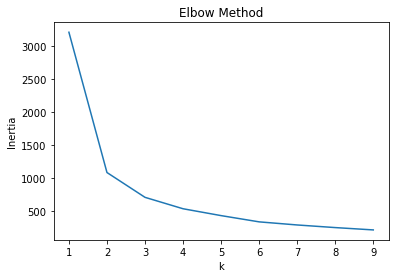

In [12]:
inertias = {}
K = range(1, 10)
for k in K:
    kmeanmodel = KMeans(n_clusters=k).fit(X_pca)
    inertias[k]= kmeanmodel.inertia_
    
# Plot
plt.plot(list(inertias.keys()), list(inertias.values()))
plt.xlabel('k')
plt.ylabel('Inertia')
plt.title('Elbow Method')
plt.show()

In [13]:
# Create a KMeans model with 2 clusters
model = KMeans(n_clusters=2, random_state=42).fit(X_scaled)

In [14]:
# Calc predicted values
y_pred = model.predict(X_scaled)
y_pred

array([1, 1, 1, ..., 0, 0, 0], dtype=int32)

In [16]:
df_pca["cluster"] = y_pred
df_pca.head()

,principal component 1,principal component 2,cluster
0,0.425306,-0.322974,1
1,0.442248,-0.429132,1
2,0.262132,-0.436503,1
3,0.249114,-0.383354,1
4,-0.192015,-0.402299,0


In [17]:
# Add predicted values to df_pca and replot the scatter plot of the PCA components, coloring by predicted cluster
#df_pca["cluster"] = y_pred
df_pca.hvplot.scatter(
    x="principal component 1",
    y="principal component 2",
    by="cluster"
)

:NdOverlay   [cluster]
   :Scatter   [principal component 1]   (principal component 2)

In [18]:
# Add predicted values onto the original dataframe
df_y = pd.DataFrame(y_pred, columns=['Cluster'])
df_y.head()
#combined = df.join(df_y, how='inner')
#combined.head()

,Cluster
0,1
1,1
2,1
3,1
4,0


In [19]:
combined = df.join(df_y, how='inner')
combined.head()

,place_overall,place_gender,bib,name,division,half,finish,country,Cluster
0,1,1,1,"Farah, Mo (GBR)",35-39,3786.0,7511.0,GBR,1
1,2,2,2,"Bayih, Mosinet Geremew (ETH)",25-29,3784.0,7524.0,ETH,1
2,3,3,3,"Osako, Suguru (JPN)",25-29,3784.0,7550.0,JPN,1
3,4,4,4,"Kipkemoi, Kenneth (KEN)",30-34,3784.0,7557.0,KEN,1
4,5,5,5,"Rupp, Galen (USA)",30-34,3784.0,7581.0,USA,0


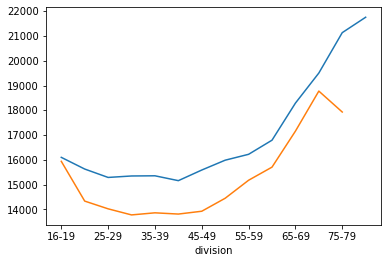

In [20]:
# Print out summary statistics of finish time by Cluster
combined[combined['Cluster'] == 0].groupby('division').median()['finish'].plot()
combined[combined['Cluster'] == 1].groupby('division').median()['finish'].plot()